# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Qonita Azizah
- **Email:** qonitaazh@gmail.com
- **ID Dicoding:** b25b9d046

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi nilai transaksi untuk setiap metode pembayaran, dan metode mana yang paling sering digunakan untuk transaksi dengan nominal tinggi selama 2016–2018?
- Negara bagian mana yang memiliki jumlah pelanggan terbanyak dan paling sedikit selama periode 2016–2018, serta seberapa besar perbedaan jumlah pelanggan di antara keduanya?
- Negara bagian mana yang memiliki jumlah penjual terbanyak dan paling sedikit selama periode 2016–2018, serta seberapa besar perbedaan jumlah pelanggan di antara keduanya?
- Pelanggan mana yang memberikan kontribusi terbesar terhadap total revenue berdasarkan analisis RFM?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Muat data Customers
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Dataset customers_df berhasil dimuat ke dalam notebook, terdiri dari 5 kolom yaitu customer_id,	customer_unique_id,	customer_zip_code_prefix,	customer_city,	customer_state

In [4]:
#Muat data Geolocation
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/geolocation_dataset.csv")
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Dataset geolocation_df berhasil dimuat ke dalam notebook, terdiri dari 5 kolom yaitu geolocation_zip_code_prefix	geolocation_lat	geolocation_lng	geolocation_city	geolocation_state

In [5]:
#Muat data Order Items
order_items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/order_items_dataset.csv")
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Dataset order_items_df berhasil dimuat ke dalam notebook, terdiri dari 7 kolom yaitu order_id	order_item_id	product_id	seller_id	shipping_limit_date	price	freight_value

In [6]:
#Muat data Order Payment
order_payments_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/order_payments_dataset.csv")
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Dataset order_payments_df berhasil dimuat ke dalam notebook, terdiri dari 5 kolom yaitu order_id	payment_sequential	payment_type	payment_installments	payment_value

In [7]:
#Muat data Orders
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/orders_dataset.csv")
orders_df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


**Insight:**
- Dataset orders_df berhasil dimuat ke dalam notebook, terdiri dari 8 kolom yaitu order_id	customer_id	order_status	order_purchase_timestamp	order_approved_at	order_delivered_carrier_date	order_delivered_customer_date	order_estimated_delivery_dat

In [8]:
#Muat data Sellers
sellers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/sellers_dataset.csv")
sellers_dataset_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset sellers_dataset_df berhasil dimuat ke dalam notebook, terdiri dari 4 kolom yaitu seller_id	seller_zip_code_prefix	seller_city	seller_state

### Assessing Data

In [9]:
#Menilai data customer_df untuk memastika data tiap kolom sesuai
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Setelah menampilkan informasi data pada kolom customers_df, tidak terdapat masalah pada data customer_df

In [10]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
customers_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak terdapat duplikasi pada data customers_df
- Tidak ada keanehan dalam deskripsi data customer_df

In [11]:
#Menilai data geolocation_df untuk memastikan data tiap kolom sesuai
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight:**
- Setelah menampilkan informasi data pada kolom geolocation_df, tidak terdapat masalah pada data geolocation_df

In [12]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
geolocation_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Terdapat data yang terduplikasi pada geolocation_df. sehingga data yang terduplikasi harus dibersihkan
- Tidak ada keanehan dalam deskripsi data geolocation_df.

In [13]:
#Menilai data order_items_df untuk memastikan data tiap kolom sesuai
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Setelah menampilkan informasi data pada kolom order_items_df, terdapat kesalahan type data pada kolom shipping_limit_date. Kolom yang mengalami kesalahan data harus di ubah sesuai dengan tipe data seharusnya.

In [14]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
order_items_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Insight:

- Tidak duplikat pada dataset order_items_df
- Tidak terdapat keanehan pada deskripsi dataset order_items_df

In [15]:
#Menilai data order_payments_df untuk memastikan data tiap kolom sesuai
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Setelah menampilkan informasi data pada kolom order_payments_df, tidak terdapat masalah pada dataset order_payments_df.

In [16]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
order_payments_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak terdapat duplikasi pada data order_payments_df
- Tidak ada keanehan dalam deskripsi data order_payments_df

In [17]:
#Menilai data order_df untuk memastikan data tiap kolom sesuai
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Setelah menampilkan informasi data pada kolom orders_df, terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date yang perlu di bersihkan.
- Terdapat kesalahan type data pada kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. perlu di ubah ke type data yang sesuai dengannya kolom(date).

In [18]:
orders_df.isna().sum() #Melakukan pengecekkan kolom yang terdapat missing value

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
Setelah menampilkan informasi data missing value pada kolom orders_df:
- order_approved_at (160 data) -> data ini missing kemungkinan pesanan dibatalkan
- order_delivered_carrier_date (1.783 data) -> data ini missing kemungkinan pesanan di batalkan atau masih dalam proses
- order_delivered_customer_date (2965 data) -> data ini missing kemungkinan pesanan di batalkan atau masih dalam proses

data yang missing pada kolom tidak masalah jika karena bisa jadi dalam proses pemesanan dan merupakan hal wajar

In [19]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
orders_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


***Insight***
- Tidak terdapat duplicate pada dataset orders_df
- Tidak terdapat masalah Deskripsi dataset orders_df

In [20]:
#Menilai data sellers_dataset_df untuk memastikan data tiap kolom sesuai
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Setelah menampilkan informasi data pada kolom sellers_df, tidak terdapat masalah pada data sellers_df

In [21]:
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
sellers_dataset_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak terdapat duplikasi pada data sellers_df
- Tidak ada keanehan dalam deskripsi data sellers_df

### Cleaning Data

In [22]:
geolocation_df.drop_duplicates(inplace=True) #Menghapus Duplikat

In [23]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- menghapus duplikasi pada geolocation_df untuk menangani duplikat pada data

In [24]:
#Mengubah tipe data pada kolom shipping_limit_date menjadi date time
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Insight:

- merubah tipe data yang sesuai pada kolom shipping_limit_date yang merupakan waktu

In [25]:
#Mengubah tipe data pada kolom "order_purchase_timestamp" ,"order_approved_at" ,"order_delivered_carrier_date","order_delivered_customer_date" , "order_estimated_delivery_date" menjadi date time
datetime_columns = ["order_purchase_timestamp" ,"order_approved_at" ,"order_delivered_carrier_date","order_delivered_customer_date" , "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Insight:

- Setelah dilakukan perubahan type data pada kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date ke tipe data date

In [26]:
orders_df[orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)] #Melihat missing value order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Insight:

- Setelah menampilkan data yang missing value dapat kita lihat bahwa data yang missing value pengaruh dari proses yang sedang berlangsung pada pesanan

In [27]:
orders_df.isna().sum() #Melihat missing value pada setiap kolom

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
Setelah menampilkan informasi data missing value pada kolom orders_df:
- order_approved_at (160 data) -> data ini missing kemungkinan pesanan dibatalkan
- order_delivered_carrier_date (1.783 data) -> data ini missing kemungkinan pesanan di batalkan atau masih dalam proses
- order_delivered_customer_date (2965 data) -> data ini missing kemungkinan pesanan di batalkan atau masih dalam proses

data yang missing pada kolom tidak masalah jika karena bisa jadi dalam proses pemesanan dan merupakan hal wajar

In [28]:
#mengganti data yang masih mengalami missing value
for col in ['order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date']:
    orders_df[col].fillna(orders_df['order_estimated_delivery_date'], inplace=True)

/tmp/ipython-input-3122447618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df[col].fillna(orders_df['order_estimated_delivery_date'], inplace=True)


**Insight:**
- Data dilakukan imputation pada kolom yang mengalami missing value dengan kolom estimated_delivery_date agar tidak manampilkan missing value pada data

In [29]:
orders_df.info() #Melihat kembali informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Setelah melakukan proses cleaning pada dataset orders_info, kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, tidak terdapat missing value
- Kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date ke tipe data date

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
order_payments_df.describe(include="all") #menampilkan keseluruhan data pada order_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [31]:
#mengelompokkan berdasarkan type payment transaksi yg tertinggi
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
     "payment_value" : ["max","min","mean","std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

**Insight** Terdapat melihat Not defined dapat terjadi kemungkinan transaksi sebelum memilih metode pembayaran, atau pembayarannya gagal diproses. Sistem kemudian mencatat pesanan ini dengan nilai pembayaran 0 dan tipe pembayaran kosong. karena jumlah nya sedikit maka akan dilakukan penghapusan pada not_defined tersebut

In [32]:
#menghapus kolom
payment_df=order_payments_df[order_payments_df['payment_type'] != 'not_defined']

# memeriksa 'not_defined' sudah hilang
print(payment_df['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card']


In [33]:
#Membuat Group payment_df dan order_id
payment_order_df = pd.merge(
    left=orders_df,
    right=payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


**Insidght**
- Melakukan penggabungan data payment_df dan order_id yang berrnama payment_order_df yang bertujuan untuk mengambil tanggal pembayaran. Dari penggabungan dataset payment_df dan order_id terdapat 12 kolom penggabungan dari kedua dataset.

In [34]:
customers_df.describe(include="all") #menampilkan keseluruhan data pada order_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [35]:
#Membuat Group payment_order_df dan payment_order_df
customer_po_df = pd.merge(
    left=payment_order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_po_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


**Insight**
- Melakukan penggabungan data payment_order_df dan customer_df yang bernama customer_po_df. Dari penggabungan dataset payment_order_df dan customer_df terdapat 16 kolom penggabungan dari kedua dataset.

In [36]:
#Membuat Group order_items_df dan order_items_df
items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_dataset_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


**Insight**
- Melakukan penggabungan data order_items_df dan sellers_dataset_df yang bernama items_seller_df. Dari penggabungan dataset order_items_df dan sellers_dataset_df terdapat 9 kolom penggabungan dari kedua dataset.

In [37]:
#Membuat Group payment_df dan order_id
all_data_df = pd.merge(
    left=items_seller_df,
    right=customer_po_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,2018-08-14 13:32:39,2018-08-20,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,2017-03-01 16:42:31,2017-03-17,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


**Insight**
- Melakukan penggabungan data items_seller_df dan customer_po_df yang bernama all_data_df. berisi 5 dataset yaitu seller_dataset_df, customers_id, orders_id, order_items_id, dan order_payment_id.

In [38]:
#mengelompokkan customer berdasarkan state
bycustomer_df = all_data_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
bycustomer_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bycustomer_df

,customer_state,customer_count
0,AC,77
1,AL,399
2,AM,142
3,AP,67
4,BA,3257
5,CE,1305
6,DF,2062
7,ES,1956
8,GO,1942
9,MA,719


**Insight**
- Melakukan perhitungan total customer berdasarkan negara. untuk melihat negara yang memiliki cutomer paling tinggi.

In [39]:
#mengelompokkan seller berdasarkan state
byseller_df = all_data_df.groupby(by="seller_state").seller_id.nunique().reset_index()
byseller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
byseller_df

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


**Insight:**
- Mengelompokkan seller berdasarkan state untuk melihat count atau total dari jumlah seller

In [40]:
#mengelompokkan berdasarkan type payment transaksi yg tertinggi
all_data_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
     "payment_value" : ["max","min","mean","std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19614       7274.88  11.62  177.535295  292.262648
credit_card     75991      13664.08   0.01  179.661264  267.885121
debit_card       1521       4445.50  13.38  149.931319  253.432703
voucher          3766       1839.05   0.00   64.691270   92.463000

**Insight**
- Setelah kita melakukan pengelompokkan pada dataset payment, terdapat 4 metode pembayaran yang umum digunakan ketika pemesanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2977319355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


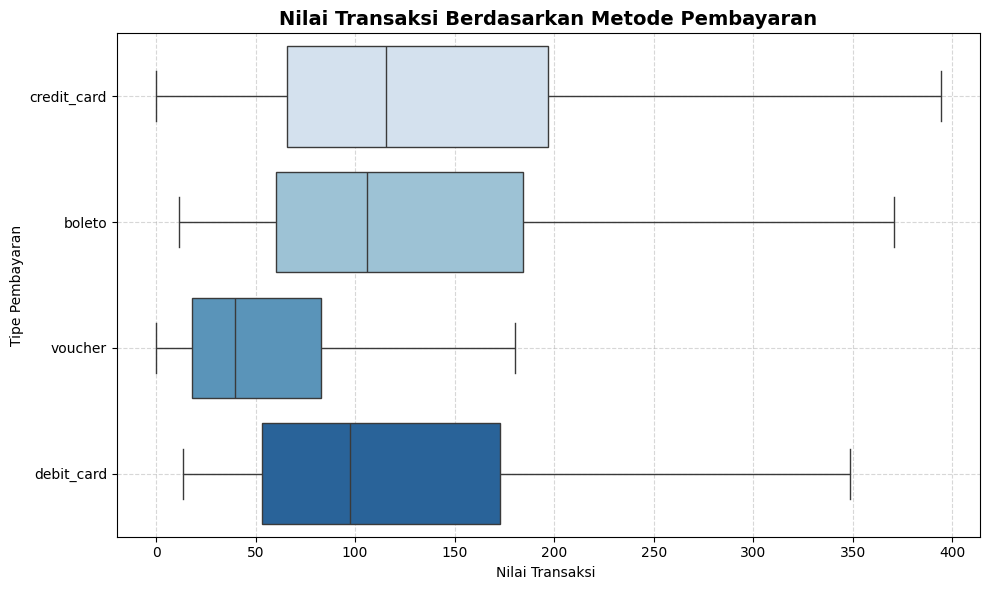

In [41]:
#Visualisasi data order_payment untuk mengethau minimal dan maksima metode pembayan yang digunakan
plt.figure(figsize=(10,6))
sns.boxplot(
    data=all_data_df,
    x="payment_value",
    y="payment_type",
    showfliers=False,  # agar outlier ekstrem tidak mengganggu visual
    palette="Blues"
)

plt.title("Nilai Transaksi Berdasarkan Metode Pembayaran", fontsize=14, fontweight='bold')
plt.xlabel("Nilai Transaksi ")
plt.ylabel("Tipe Pembayaran")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Insight:**
- metode pembayaran credit_card memiliki distribusi nilai transaksi yang lebih tinggi dibanding metode lainnya. Credit_card mrmiliki Nilai transaksi besar diaman transaksi tertinggi credit_card sebesar 13664.08 dan rata-rata transaksi sebesar 179.67 dan Cutomer cenderung menggunakan kartu kredit untuk transaksi dengan nominal besar. Metode kedua untuk menajadi pilihan yaitu boleto.
- Penyebaran nilai transaksi credit card sebesar 267.8 yang artinya variasinya stabil dimana customer melakukan transksi cenderung rutin dalam melakukan transaksi
- Selama periode 2016–2018, metode pembayaran credit card mendominasi transaksi dengan nilai tinggi
- metode seperti voucher  memiliki nilai transaksi yang rendah. voucher dapat meruapakan promo yang disediakan oleh marketplace.
- Distribusi yang bervariasi juga mengindikasikan adanya perbedaan karakteristik pelanggan berdasarkan metode pembayaran yang digunakan.

### Pertanyaan 2:

/tmp/ipython-input-358700153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-358700153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1])


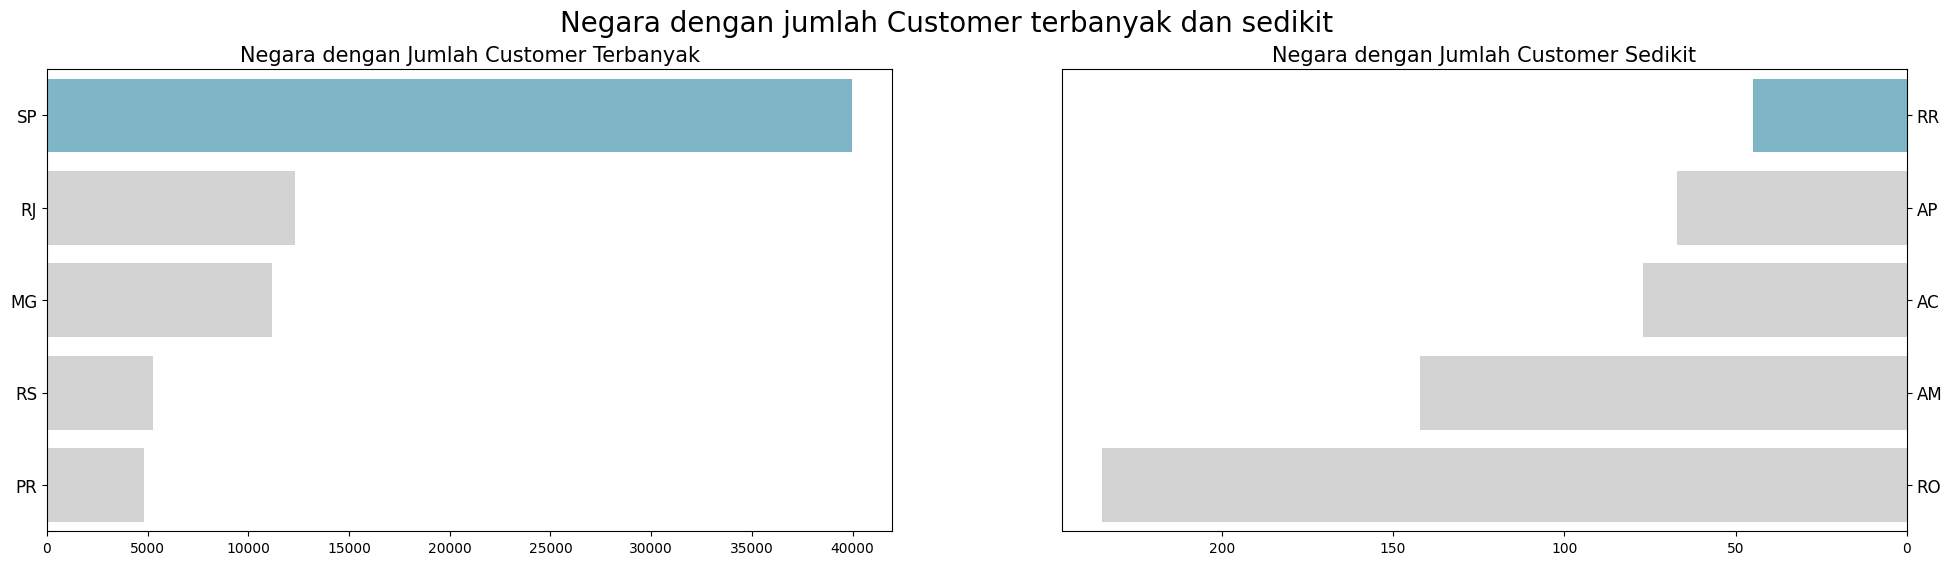

In [42]:
#visualisasi bar untuk melihat customer tertinggi pada setiap state
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Negara dengan Jumlah Customer Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara dengan Jumlah Customer Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Negara dengan jumlah Customer terbanyak dan sedikit", fontsize=20)
plt.show()

**Insight:**
- Negara dengan jumlah pelanggan terbanyak adalah SP, sedangkan pelanggan paling sedikit berasal dari RR.
- Perbedaan jumlah pelanggan antara negara SP dan RR sangat signifikan, yaitu sekitar puluhan ribu pelanggan, menunjukkan konsentrasi pelanggan yang sangat besar di wilayah SP dibandingkan negara bagian lainnya.
- Dapat dilihat bahwa aktivitas e-commerce terkonsentrasi di negara SP.

### Pertanyaan 3:

/tmp/ipython-input-668644825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-668644825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=True).head(5), palette=colors, ax=ax[1])


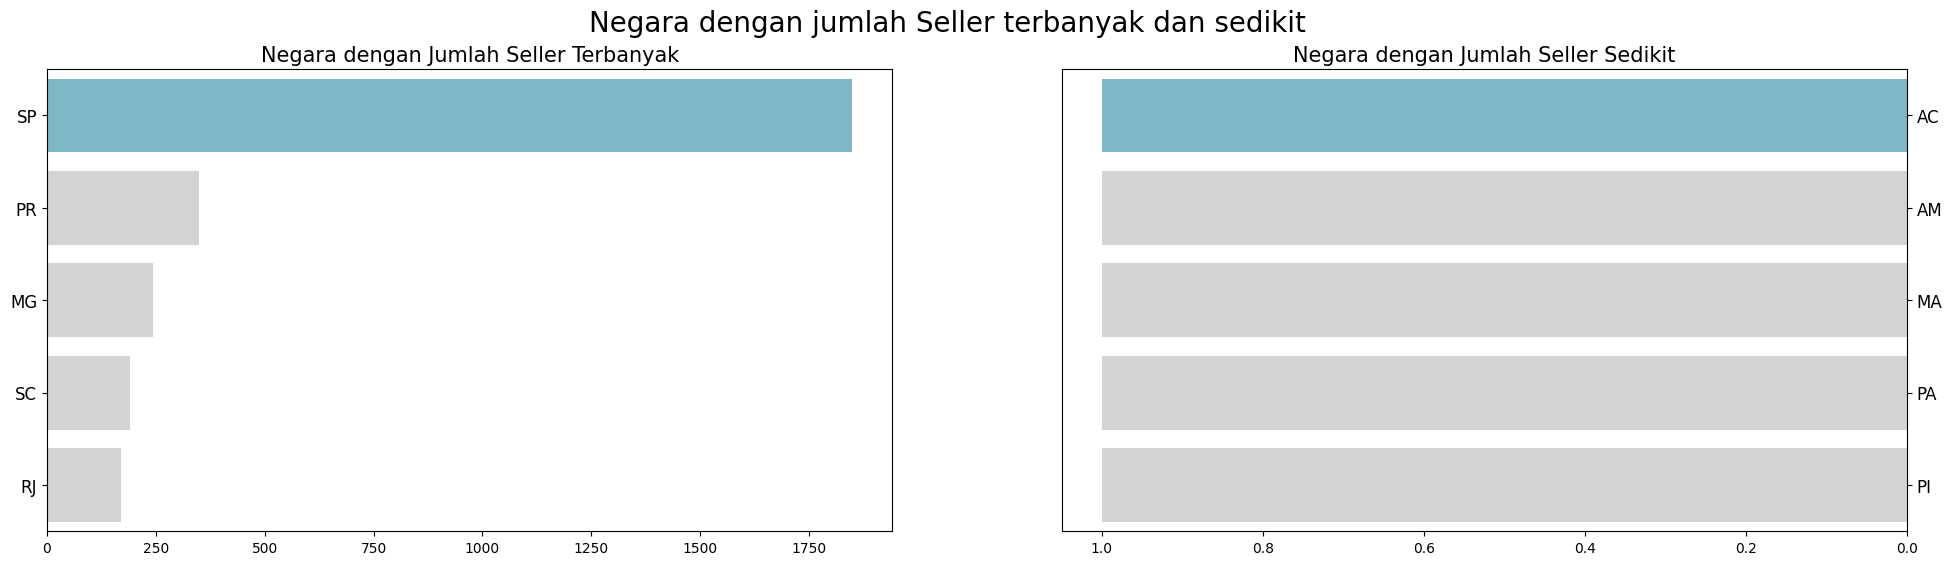

In [43]:
#visualisasi bar untuk melihat seller tertinggi dan terendah pada setiap state
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Negara dengan Jumlah Seller Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara dengan Jumlah Seller Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Negara dengan jumlah Seller terbanyak dan sedikit", fontsize=20)
plt.show()

**Insight:**
- Negara dengan jumlah penjual terbanyak adalah SP , sedangkan yang paling sedikit adalah AC, AM, MA, PA, PI.
- Selisih antara penjual dari negara  AC, AM, MA, PA, PI, dan SP cukup besar — lebih dari 1.800 penjual, menunjukkan bahwa sebagian besar penjual e-commerce terkonsentrasi di SP.
- Berdasarkan visualisai dapat kita lihat selisih seller SP dan PR juga cukup besar. Kemungkinan seller belum merata di negara bagian lainnya.

## Analisis Lanjutan (Opsional)

In [44]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = payment_order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


In [45]:
rfm_df['order_short_id'] = rfm_df['customer_id'].str.slice(start=0, stop=4)

/tmp/ipython-input-4219082801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="order_short_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-4219082801.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="order_short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-4219082801.py:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="frequency", x="order_short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython

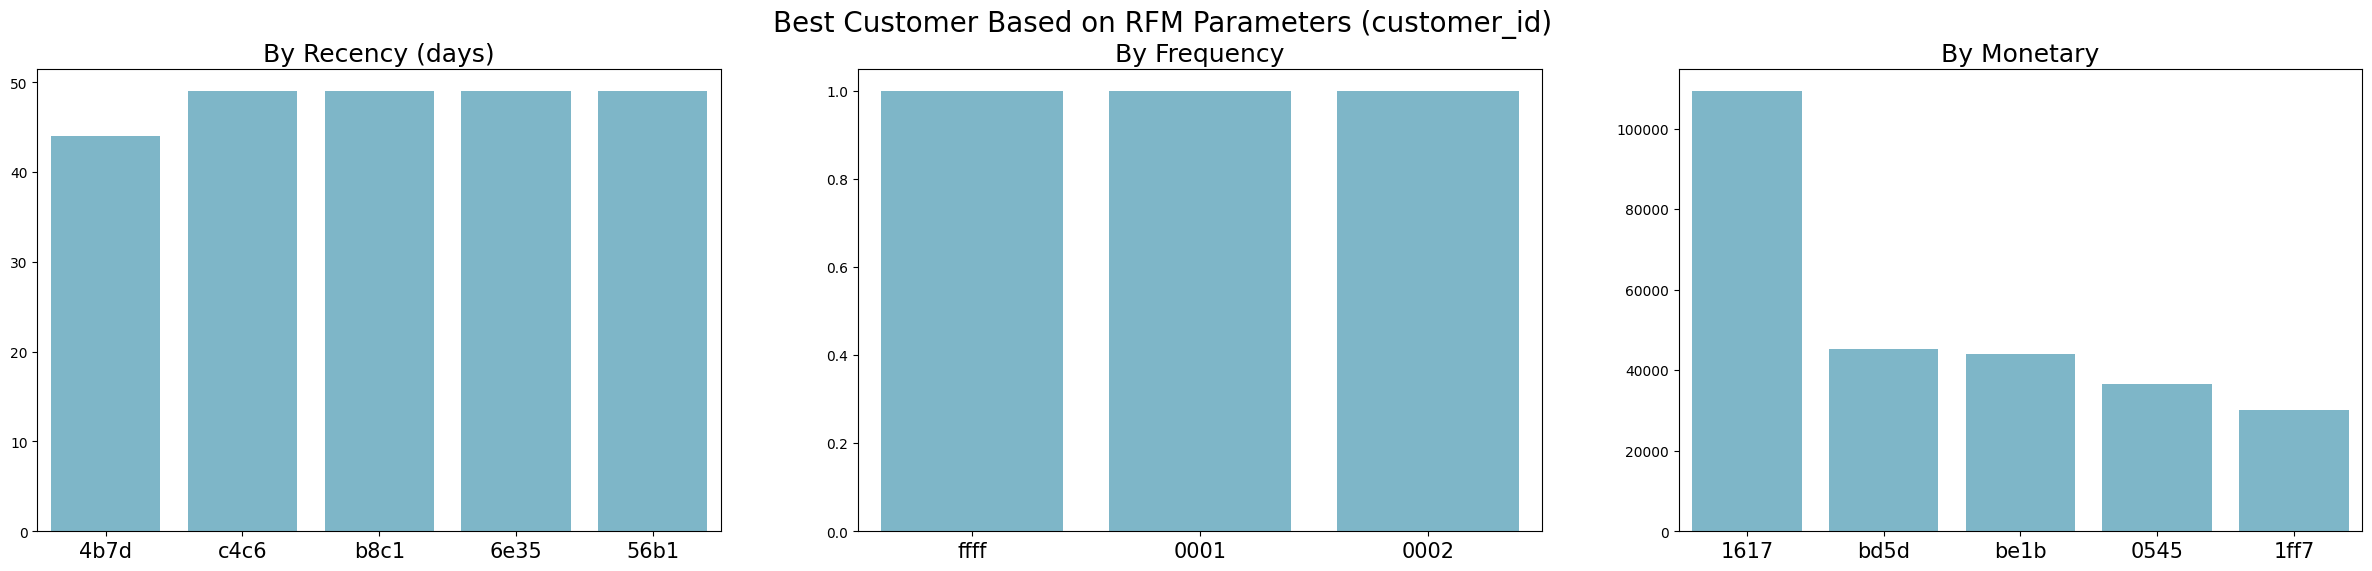

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="order_short_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="order_short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="order_short_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight**
1. Recency Menunjukkan pelanggan dengan waktu pembelian terakhir paling baru — artinya pelanggan yang masih aktif. Dengan sumbu-X = ID pelanggan dan Sumbu-Y = total belanja.
- Pelanggan dengan ID 4b7d, c4c6, b8c1, 6e35 dan 56b1 termasuk pelanggan yang baru saja melakukan transaksi dan juga memiliki nilai pembelian yang cukup tinggi.

2. Frequency menunjukkan  pelanggan yang paling sering melakukan transaksi. Dengan Sumbu-X = ID pelanggan dan Sumbu-Y = Jumlah transaksi.  
- Pelanggan dengan ID ffff, 0001, dan 0002 memiliki tingkat frekuensi pembelian tertinggi dibanding pelanggan lainnya.

3. Monetary meruapakan pelanggan dengan total pengeluaran tertinggi selama periode analisis. Dengan Sumbu-X = ID pelanggan dan Sumbu-Y = Nilai total pembelian.
- Pelanggan dengan ID 1617 memiliki nilai transaksi tertinggi dibanding bd5d, be1b, be1b, 0545, dan 1ff7 yang memiliki selisih nilai transaksi tinggi.

## Conclusion

1. Conclution pertanyaan 1: Metode pembayaran credit_card memberikan kontribusi terbesar terhadap total revenue, mrmiliki Nilai transaksi besar dimana transaksi tertinggi credit_card sebesar 13664.08 dan rata-rata transaksi sebesar 179.67 dan Customer cenderung menggunakan kartu kredit untuk transaksi dengan nominal besar. Dapat menerapkan strategi dengan memberikan voucher/diskon/cashback pengguna credit card dengan salah satu syarat terdapat minimal transaksi dimana ini bertujuan untuk untuk meningkatkan rata-rata nilai pembelian, mendorong pembelian berulang, dan memperkuat loyalitas pelanggan.

2. Conclution pertanyaan 2: Negara dengan jumlah pelanggan terbanyak adalah SP, sedangkan pelanggan paling sedikit berasal dari RR. Oleh karena itu, strategi yang diusulkan adalah: mempertahankan loyalitas di pasar negara "SP" dengan voucher gratis ongkir. al ini bertujuan untuk menjaga retensi pelanggan dan meningkatkan frekuensi pembelian pada wilayah dengan basis pelanggan terbesar. untuk pelanggan dengan jumlah sedikit, dapat diberikan diskon/cashback khusus wilayah serta voucher khusus untuk pelanggan yang mengajak teman/referal. Hal ini bertujuan untuk menarik minat pembelian pertama, meningkatkan aktivitas transaksi, serta membangun loyalitas pelanggan baru di wilayah dengan tingkat transaksi rendah.

3. Conclution pertanyaan 3: Negara dengan jumlah penjual terbanyak adalah SP , sedangkan yang paling sedikit adalah AC, AM, MA, PA, PI. strategi untuk negara yang memiliki penjual terbanyak yaitu Menawarkan program seller ekslusif yang memberikan keuntungan tambahan seperti promosi produk prioritas atau biaya layanan yang lebih rendah serta memberikan tingkatan badge untuk penjual berdasarkan performal aktif dan order.

4. conclution pertanyaan 4: Pelanggan dengan ID 4b7d, c4c6, b8c1, 6e35, dan 56b1 baru saja melakukan transaksi, menandakan mereka adalah pelanggan yang masih aktif dan berpotensi loyal. Pelanggan dengan ID ffff, 0001, dan 0002 tercatat paling sering bertransaksi, menunjukkan keterlibatan tinggi terhadap platform.Pelanggan dengan ID 1617 memiliki nilai transaksi tertinggi dibanding bd5d, be1b, be1b, 0545, dan 1ff7 yang memiliki selisih nilai transaksi tinggi.  pelanggan dengan frekuensi tinggi dan nilai transaksi besar dapat dikategorikan sebagai customer loyal. Dapat memberikan kategori membership berdasarkan jumlah transaksi atau total pesanan yang dilakukan dalam jangka waktu yang di tentunakan (6 bulan) dimana kategori tersebut mendapatkan spesial voucher, diskon dan promo produk lainnya.

In [47]:
all_data_df.to_csv("all_data.csv", index=False)

In [48]:
from google.colab import files
files.download("all_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Correcting the function name to pd.to_datetime for date columns
# order_items_df["dteday"] = pd.to_datetime(order_items_df["dteday"]) # Assuming 'dteday' exists and is a date column
# order_payments_df["dteday"] = pd.to_datetime(order_payments_df["dteday"]) # Assuming 'dteday' exists and is a date column
# customers_df["dteday"] = pd.to_datetime(customers_df["dteday"]) # Assuming 'dteday' exists and is a date column
# geolocation_df["dteday"] = pd.to_datetime(geolocation_df["dteday"]) # Assuming 'dteday' exists and is a date column
# order_full["dteday"] = pd.to_datetime(order_full["dteday"]) # Assuming 'dteday' exists and is a date column
# sellers_dataset_df["dteday"] = pd.to_datetime(sellers_dataset_df["dteday"]) # Assuming 'dteday' exists and is a date column

# The following lines were causing a NameError because all_df was not defined.
# Assuming the goal is to save one of the existing dataframes,
# you need to replace 'all_df' with the name of the dataframe you want to save.
# Example: To save the 'orders_df' dataframe:

# from google.colab import files
# orders_df.to_csv('orders_df.csv', index=False)
# files.download('orders_df.csv')

# Or if you intended to merge dataframes into all_df, you need to perform the merge first.

# The line below also causes a NameError because all_df is not defined.
# all_df.to_csv("all_date", index=False)
# print("data csv berhasil dibuat: all_df.csv")



In [50]:
# from google.colab import files


# # Blok 'try' ini untuk menangkap error jika salah satu
# # DataFrame Anda ada yang belum terdefinisi (misal: 'order_full')
# try:
#     # 1. Membuat daftar semua DataFrame Anda
#     data_frames = {

#         "order_full.csv": order_full
#         # Pastikan 'order_full' sudah Anda buat
#     }

#     print("Memulai proses penyimpanan dan unduh...")

#     # 2. Loop untuk menyimpan dan mengunduh setiap file
#     for nama_file, df in data_frames.items():

#         # 3. Simpan DataFrame ke file CSV
#         df.to_csv(nama_file, index=False)

#         # 4. Cetak pesan sukses
#         print(f"Berhasil menyimpan: {nama_file}")

#         # 5. Memicu download
#         files.download(nama_file)
#         print(f"Mengunduh {nama_file}...")

#     print("--- Selesai ---")

# except NameError as e:
#     print(f"--- GAGAL ---")
#     print(f"Error: {e}")
#     print("\nPastikan Anda sudah memuat (me-running) sel untuk SEMUA DataFrame yang Anda sebutkan.")
# except Exception as e:
#     print(f"--- GAGAL: Terjadi error tak terduga ---")
#     print(f"Error: {e}")